# Python4Bio - Pandas (part 1)
_Maydan Wienreb_
<img src="https://raw.githubusercontent.com/maydanw/InEasyReach/master/hr-brian-litzinger-one.png" alt="Drawing" style="width: 100%; height: 60px" />

In [7]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [8]:
%config IPCompleter.greedy=True
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Fetching the course content

Make sure you have git installed and then:
  
**Option 1**  
1. Press winkey+R and write `cmd`
1. Navigate to where the code should be using `cd`
1. run `git clone https://gitlab.com/maydanw/python4bio`
1. `cd python4bio`
1. `jupyter notebook`

**Option 2**
1. Press winkey and type Anaconda Navigator
1. Lunch Jupyter  
<img src="Resources/JupyterSymbol.png" style="width: 300px; height: 300px"></img>
1. Create a new Jupyter notebook
<img src="Resources/NewNotebook.png" style=" height: 250px"></img>

1. Type `!git clone https://gitlab.com/maydanw/python4bio`
1. Close the notebook and clean it 
1. Enter the python4bio folder

# What is Pandas
pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

Pandas is well suited for many different kinds of data:

* Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure  
  
The two primary data structures of pandas, **Series** (1-dimensional) and **DataFrame** (2-dimensional),  

# Importing

In [9]:
import pandas as pd
import numpy as np

In [10]:
print(pd.__version__)

0.24.2


## Extra imports for later visualizations

In [11]:
# import graphics
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
import seaborn as sns
sns.set_style("whitegrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Object creation

In [12]:
s = pd.Series([1, 3, 5, np.nan, 6, 8],index=['a','b','c','d','e','f'])
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [13]:
s['f']

8.0

In [14]:
dates = pd.date_range('20190101', '20190106')
dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

A         B         C         D
2019-01-01 -0.250574 -0.408408  0.284848 -0.511094
2019-01-02 -0.468727  0.018818 -0.684273 -0.177444
2019-01-03  0.627941 -0.360328 -0.834093  0.270174
2019-01-04 -0.254797  0.678810  1.958943  0.255646
2019-01-05  0.715795 -0.469457  0.487342  2.416946
2019-01-06  1.586336 -0.521659 -1.771415  0.261699

In [16]:
list(range(4))

[0, 1, 2, 3]

In [17]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series([1,5,17,3], index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

A          B     C  D      E    F
0  1.0 2013-01-02   1.0  3   test  foo
1  1.0 2013-01-02   5.0  3  train  foo
2  1.0 2013-01-02  17.0  3   test  foo
3  1.0 2013-01-02   3.0  3  train  foo

In [18]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing Data

In [19]:
df.head(2)

A         B         C         D
2019-01-01 -0.250574 -0.408408  0.284848 -0.511094
2019-01-02 -0.468727  0.018818 -0.684273 -0.177444

In [20]:
df.sample(3)

A         B         C         D
2019-01-04 -0.254797  0.678810  1.958943  0.255646
2019-01-02 -0.468727  0.018818 -0.684273 -0.177444
2019-01-01 -0.250574 -0.408408  0.284848 -0.511094

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.325996 -0.177037 -0.093108  0.419321
std    0.791569  0.460920  1.296606  1.028220
min   -0.468727 -0.521659 -1.771415 -0.511094
25%   -0.253741 -0.454195 -0.796638 -0.069172
50%    0.188684 -0.384368 -0.199713  0.258672
75%    0.693831 -0.075968  0.436718  0.268056
max    1.586336  0.678810  1.958943  2.416946

In [23]:
df.sort_values(by='B')

A         B         C         D
2019-01-06  1.586336 -0.521659 -1.771415  0.261699
2019-01-05  0.715795 -0.469457  0.487342  2.416946
2019-01-01 -0.250574 -0.408408  0.284848 -0.511094
2019-01-03  0.627941 -0.360328 -0.834093  0.270174
2019-01-02 -0.468727  0.018818 -0.684273 -0.177444
2019-01-04 -0.254797  0.678810  1.958943  0.255646

**Exercise:**   
Use ```example_df = pd.read_csv('./Resources/Data/agg_results.csv', index_col=0) ``` to load a dataframe and look at the data 


In [24]:
example_df = pd.read_csv('./Resources/Data/agg_results.csv', index_col=0)

# Selection

In [25]:
df

A         B         C         D
2019-01-01 -0.250574 -0.408408  0.284848 -0.511094
2019-01-02 -0.468727  0.018818 -0.684273 -0.177444
2019-01-03  0.627941 -0.360328 -0.834093  0.270174
2019-01-04 -0.254797  0.678810  1.958943  0.255646
2019-01-05  0.715795 -0.469457  0.487342  2.416946
2019-01-06  1.586336 -0.521659 -1.771415  0.261699

In [26]:
df['A']

2019-01-01   -0.250574
2019-01-02   -0.468727
2019-01-03    0.627941
2019-01-04   -0.254797
2019-01-05    0.715795
2019-01-06    1.586336
Freq: D, Name: A, dtype: float64

In [27]:
df[['A','C']]

A         C
2019-01-01 -0.250574  0.284848
2019-01-02 -0.468727 -0.684273
2019-01-03  0.627941 -0.834093
2019-01-04 -0.254797  1.958943
2019-01-05  0.715795  0.487342
2019-01-06  1.586336 -1.771415

In [28]:
df[0:3]

A         B         C         D
2019-01-01 -0.250574 -0.408408  0.284848 -0.511094
2019-01-02 -0.468727  0.018818 -0.684273 -0.177444
2019-01-03  0.627941 -0.360328 -0.834093  0.270174

In [29]:
df[0:3]["D"]

2019-01-01   -0.511094
2019-01-02   -0.177444
2019-01-03    0.270174
Freq: D, Name: D, dtype: float64

## Selection by Label

In [30]:
df.loc['2019-01-02', ['A', 'B']]

A   -0.468727
B    0.018818
Name: 2019-01-02 00:00:00, dtype: float64

In [31]:
df.loc[:, ['A', 'B']]

A         B
2019-01-01 -0.250574 -0.408408
2019-01-02 -0.468727  0.018818
2019-01-03  0.627941 -0.360328
2019-01-04 -0.254797  0.678810
2019-01-05  0.715795 -0.469457
2019-01-06  1.586336 -0.521659

In [32]:
df.loc['2019-01-02':'2019-01-04', ['A', 'B']]

A         B
2019-01-02 -0.468727  0.018818
2019-01-03  0.627941 -0.360328
2019-01-04 -0.254797  0.678810

In [33]:
df.loc[dates[0], 'A']

-0.2505735443407523

## Selection by Position

In [34]:
df.iloc[3:5, 0:2]

A         B
2019-01-04 -0.254797  0.678810
2019-01-05  0.715795 -0.469457

In [35]:
df.iloc[:, 1:3]

B         C
2019-01-01 -0.408408  0.284848
2019-01-02  0.018818 -0.684273
2019-01-03 -0.360328 -0.834093
2019-01-04  0.678810  1.958943
2019-01-05 -0.469457  0.487342
2019-01-06 -0.521659 -1.771415

In [36]:
df.iloc[[1, 2, 4], [0, 2]]

A         C
2019-01-02 -0.468727 -0.684273
2019-01-03  0.627941 -0.834093
2019-01-05  0.715795  0.487342

## Boolean Indexing

In [37]:
example_df.columns

Index(['index', 'Cyto_border_case', 'Cyto_intensity_avg',
       'Cyto_intensity_count', 'Cyto_intensity_max', 'Cyto_intensity_q10',
       'Cyto_intensity_q50', 'Cyto_intensity_q90', 'Cyto_intensity_std',
       'Cyto_intensity_sum',
       ...
       'nuc_in_cyto_intensity_count', 'nuc_in_cyto_intensity_max',
       'nuc_in_cyto_intensity_q10', 'nuc_in_cyto_intensity_q50',
       'nuc_in_cyto_intensity_q90', 'nuc_in_cyto_intensity_std',
       'nuc_in_cyto_intensity_sum', 'nuc_outlier', 'nucli_label', 'row'],
      dtype='object', length=201)

In [38]:
example_df.columns.str.contains('outlier')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [39]:
example_df.columns[example_df.columns.str.contains('outlier')]

Index(['cyto_outlier', 'nuc_outlier'], dtype='object')

In [40]:
df.A > 0

2019-01-01    False
2019-01-02    False
2019-01-03     True
2019-01-04    False
2019-01-05     True
2019-01-06     True
Freq: D, Name: A, dtype: bool

In [41]:
df[df.A > 0]

A         B         C         D
2019-01-03  0.627941 -0.360328 -0.834093  0.270174
2019-01-05  0.715795 -0.469457  0.487342  2.416946
2019-01-06  1.586336 -0.521659 -1.771415  0.261699

In [42]:
df[df > 0]

A         B         C         D
2019-01-01       NaN       NaN  0.284848       NaN
2019-01-02       NaN  0.018818       NaN       NaN
2019-01-03  0.627941       NaN       NaN  0.270174
2019-01-04       NaN  0.678810  1.958943  0.255646
2019-01-05  0.715795       NaN  0.487342  2.416946
2019-01-06  1.586336       NaN       NaN  0.261699

In [43]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

A         B         C         D      E
2019-01-01 -0.250574 -0.408408  0.284848 -0.511094    one
2019-01-02 -0.468727  0.018818 -0.684273 -0.177444    one
2019-01-03  0.627941 -0.360328 -0.834093  0.270174    two
2019-01-04 -0.254797  0.678810  1.958943  0.255646  three
2019-01-05  0.715795 -0.469457  0.487342  2.416946   four
2019-01-06  1.586336 -0.521659 -1.771415  0.261699  three

In [45]:
df2['E'].isin(['two', 'four'])

2019-01-01    False
2019-01-02    False
2019-01-03     True
2019-01-04    False
2019-01-05     True
2019-01-06    False
Freq: D, Name: E, dtype: bool

In [44]:
df2[df2['E'].isin(['two', 'four'])]

A         B         C         D     E
2019-01-03  0.627941 -0.360328 -0.834093  0.270174   two
2019-01-05  0.715795 -0.469457  0.487342  2.416946  four

In [46]:
df2.loc[df2['E'].isin(['two', 'four']),'A']

2019-01-03    0.627941
2019-01-05    0.715795
Freq: 2D, Name: A, dtype: float64

In [47]:
df2.loc[df2['E'].isin(['two', 'four']),'A'] = 555
df2

A         B         C         D      E
2019-01-01   -0.250574 -0.408408  0.284848 -0.511094    one
2019-01-02   -0.468727  0.018818 -0.684273 -0.177444    one
2019-01-03  555.000000 -0.360328 -0.834093  0.270174    two
2019-01-04   -0.254797  0.678810  1.958943  0.255646  three
2019-01-05  555.000000 -0.469457  0.487342  2.416946   four
2019-01-06    1.586336 -0.521659 -1.771415  0.261699  three

# Missing Data

In [49]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

A         B         C         D    E
2019-01-01 -0.250574 -0.408408  0.284848 -0.511094  1.0
2019-01-02 -0.468727  0.018818 -0.684273 -0.177444  1.0
2019-01-03  0.627941 -0.360328 -0.834093  0.270174  NaN
2019-01-04 -0.254797  0.678810  1.958943  0.255646  NaN

In [50]:
df1.dropna(how='any')

A         B         C         D    E
2019-01-01 -0.250574 -0.408408  0.284848 -0.511094  1.0
2019-01-02 -0.468727  0.018818 -0.684273 -0.177444  1.0

In [54]:
df1.fillna(value=123456)


A         B         C         D         E
2019-01-01 -0.250574 -0.408408  0.284848 -0.511094       1.0
2019-01-02 -0.468727  0.018818 -0.684273 -0.177444       1.0
2019-01-03  0.627941 -0.360328 -0.834093  0.270174  123456.0
2019-01-04 -0.254797  0.678810  1.958943  0.255646  123456.0

In [55]:
pd.isna(df1)

A      B      C      D      E
2019-01-01  False  False  False  False  False
2019-01-02  False  False  False  False  False
2019-01-03  False  False  False  False   True
2019-01-04  False  False  False  False   True

# Loading Data - Real example

In [61]:
# Lets read kine by line and exaplain it
df_example = pd.read_csv('./Resources/Data/agg_results.csv', index_col=0)

In [62]:
df_example.head(7)

index Cyto_border_case  Cyto_intensity_avg  Cyto_intensity_count  \
0      1              NaN                 NaN                   NaN   
1      2             True           17.498847               19507.0   
2      3             True           27.371687               21997.0   
3      4             True           23.919723               31142.0   
4      5            False           18.811525               11853.0   
5      6             True           13.424642               28756.0   
6      7             True           13.478155               53307.0   

   Cyto_intensity_max  Cyto_intensity_q10  Cyto_intensity_q50  \
0                 NaN                 NaN                 NaN   
1                48.0                 6.0                16.0   
2                55.0                13.0                26.0   
3                60.0                 6.0                25.0   
4                57.0                 5.0                18.0   
5                53.0                 3.0                10.0   
6                70.0                 3.0                10.0   

   Cyto_intensity_q90  Cyto_intensity_std  Cyto_intensity_sum  ...  \
0                 NaN                 NaN                 NaN  ...   
1                31.0            9.531053            341350.0  ...   
2                44.0           11.312304            602095.0  ...   
3                40.0           13.543916            744908.0  ...   
4                34.0           10.511795            222973.0  ...   
5                30.0           10.139371            386039.0  ...   
6                31.0           11.978150            718480.0  ...   

   nuc_in_cyto_intensity_count  nuc_in_cyto_intensity_max  \
0                        941.0                       70.0   
1                       1589.0                       42.0   
2                       3987.0                       55.0   
3                       3201.0                       60.0   
4                       1617.0                       43.0   
5                       1584.0                       46.0   
6                       2353.0                       70.0   

   nuc_in_cyto_intensity_q10  nuc_in_cyto_intensity_q50  \
0                       32.0                       41.0   
1                       21.0                       28.0   
2                       37.0                       45.0   
3                       40.0                       49.0   
4                       27.0                       36.0   
5                       28.0                       33.0   
6                       38.0                       46.0   

   nuc_in_cyto_intensity_q90  nuc_in_cyto_intensity_std  \
0                       48.0                   7.288315   
1                       36.0                   5.729064   
2                       50.0                   4.976257   
3                       55.0                   5.769724   
4                       39.0                   4.798299   
5                       39.0                   4.231796   
6                       62.0                   8.813774   

   nuc_in_cyto_intensity_sum  nuc_outlier  nucli_label  row  
0                    38559.0         True          NaN    B  
1                    45123.0        False          2.0    B  
2                   175987.0        False          3.0    B  
3                   154402.0        False          4.0    B  
4                    55483.0        False          5.0    B  
5                    52222.0        False          6.0    B  
6                   112438.0        False          7.0    B  

[7 rows x 201 columns]

In [63]:
df_example = df_example.drop(labels='index', axis=1)
df_example

Cyto_border_case  Cyto_intensity_avg  Cyto_intensity_count  \
0                  NaN                 NaN                   NaN   
1                 True           17.498847               19507.0   
2                 True           27.371687               21997.0   
3                 True           23.919723               31142.0   
4                False           18.811525               11853.0   
5                 True           13.424642               28756.0   
6                 True           13.478155               53307.0   
7                 True           14.477869               43581.0   
8                False           19.596124               26986.0   
9                False           17.793126               35785.0   
10                True           35.521319               51527.0   
11                 NaN                 NaN                   NaN   
12               False           16.716785               29663.0   
13                True           16.274271               71371.0   
14               False           26.724103               50787.0   
15                 NaN                 NaN                   NaN   
16                 NaN                 NaN                   NaN   
17               False           15.286291               55000.0   
18                True           15.565154               19761.0   
19               False           17.745660               65613.0   
20               False           27.087763               62669.0   
21                 NaN                 NaN                   NaN   
22               False           12.706578              120032.0   
23                 NaN                 NaN                   NaN   
24               False           16.756393              133272.0   
25               False            9.333437              145047.0   
26                True           11.186420               83655.0   
27                True           23.592150               53782.0   
28                 NaN                 NaN                   NaN   
29               False           16.067815               42631.0   
...                ...                 ...                   ...   
35079            False           19.544526               11847.0   
35080            False           18.142037               35378.0   
35081             True           15.750086               55411.0   
35082              NaN                 NaN                   NaN   
35083            False           17.426566               71091.0   
35084            False           24.194321               33172.0   
35085              NaN                 NaN                   NaN   
35086              NaN                 NaN                   NaN   
35087             True           26.975636               24709.0   
35088              NaN                 NaN                   NaN   
35089              NaN                 NaN                   NaN   
35090            False           19.536993               80340.0   
35091            False           18.859570               56498.0   
35092            False           19.555901               75321.0   
35093            False           21.552869               56858.0   
35094            False           23.923155               48292.0   
35095             True           20.501548               53299.0   
35096            False           26.000598               20062.0   
35097             True           27.737384               29149.0   
35098            False           29.514658               33498.0   
35099            False           24.785940               44039.0   
35100            False           28.306426               25210.0   
35101            False                 NaN                   NaN   
35102            False           23.600953               35239.0   
35103            False           26.726316               32501.0   
35104             True           22.367190               28985.0   
35105             True           19.603209               18821

In [64]:
df_example = df_example[df_example.nuc_outlier==False]
df_example = df_example[df_example.cyto_outlier==False]
df_example = df_example[df_example.Cyto_border_case==False]

In [65]:
df_example = df_example.drop(labels=['nuc_outlier', 'cyto_outlier', 'Cyto_border_case'], axis=1)

In [66]:
df_example.columns.tolist()

['Cyto_intensity_avg',
 'Cyto_intensity_count',
 'Cyto_intensity_max',
 'Cyto_intensity_q10',
 'Cyto_intensity_q50',
 'Cyto_intensity_q90',
 'Cyto_intensity_std',
 'Cyto_intensity_sum',
 'Cyto_morphological_area',
 'Cyto_morphological_aspect_ratio',
 'Cyto_morphological_circularity_size_ratio',
 'Cyto_morphological_cx',
 'Cyto_morphological_cy',
 'Cyto_morphological_extent',
 'Cyto_morphological_h',
 'Cyto_morphological_min_enclosing_circle_area',
 'Cyto_morphological_perimeter',
 'Cyto_morphological_rect_area',
 'Cyto_morphological_solidity',
 'Cyto_morphological_w',
 'MitoSox_in_MitoTracker_avg',
 'MitoSox_in_MitoTracker_max',
 'MitoSox_in_MitoTracker_q10',
 'MitoSox_in_MitoTracker_q50',
 'MitoSox_in_MitoTracker_q90',
 'MitoSox_in_MitoTracker_size',
 'MitoSox_in_MitoTracker_std',
 'MitoSox_intensity_avg',
 'MitoSox_intensity_count',
 'MitoSox_intensity_max',
 'MitoSox_intensity_q10',
 'MitoSox_intensity_q50',
 'MitoSox_intensity_q90',
 'MitoSox_intensity_std',
 'MitoSox_intensity_sum

In [68]:
df_example.columns = df_example.columns.str.replace('MitoSox', 'TMRE')
df_example.columns.tolist()

['Cyto_intensity_avg',
 'Cyto_intensity_count',
 'Cyto_intensity_max',
 'Cyto_intensity_q10',
 'Cyto_intensity_q50',
 'Cyto_intensity_q90',
 'Cyto_intensity_std',
 'Cyto_intensity_sum',
 'Cyto_morphological_area',
 'Cyto_morphological_aspect_ratio',
 'Cyto_morphological_circularity_size_ratio',
 'Cyto_morphological_cx',
 'Cyto_morphological_cy',
 'Cyto_morphological_extent',
 'Cyto_morphological_h',
 'Cyto_morphological_min_enclosing_circle_area',
 'Cyto_morphological_perimeter',
 'Cyto_morphological_rect_area',
 'Cyto_morphological_solidity',
 'Cyto_morphological_w',
 'TMRE_in_MitoTracker_avg',
 'TMRE_in_MitoTracker_max',
 'TMRE_in_MitoTracker_q10',
 'TMRE_in_MitoTracker_q50',
 'TMRE_in_MitoTracker_q90',
 'TMRE_in_MitoTracker_size',
 'TMRE_in_MitoTracker_std',
 'TMRE_intensity_avg',
 'TMRE_intensity_count',
 'TMRE_intensity_max',
 'TMRE_intensity_q10',
 'TMRE_intensity_q50',
 'TMRE_intensity_q90',
 'TMRE_intensity_std',
 'TMRE_intensity_sum',
 'TMRE_outside_MitoTracker_avg',
 'TMRE_ou

# Operations

In [71]:
df

A         B         C         D
2019-01-01 -0.250574 -0.408408  0.284848 -0.511094
2019-01-02 -0.468727  0.018818 -0.684273 -0.177444
2019-01-03  0.627941 -0.360328 -0.834093  0.270174
2019-01-04 -0.254797  0.678810  1.958943  0.255646
2019-01-05  0.715795 -0.469457  0.487342  2.416946
2019-01-06  1.586336 -0.521659 -1.771415  0.261699

In [73]:
df.mean(axis=0)

A    0.325996
B   -0.177037
C   -0.093108
D    0.419321
dtype: float64

In [70]:
display(df)
display(df.apply(np.cumsum, axis=0))

A         B         C         D
2019-01-01 -0.250574 -0.408408  0.284848 -0.511094
2019-01-02 -0.468727  0.018818 -0.684273 -0.177444
2019-01-03  0.627941 -0.360328 -0.834093  0.270174
2019-01-04 -0.254797  0.678810  1.958943  0.255646
2019-01-05  0.715795 -0.469457  0.487342  2.416946
2019-01-06  1.586336 -0.521659 -1.771415  0.261699

A         B         C         D
2019-01-01 -0.250574 -0.408408  0.284848 -0.511094
2019-01-02 -0.719301 -0.389589 -0.399426 -0.688538
2019-01-03 -0.091360 -0.749917 -1.233519 -0.418364
2019-01-04 -0.346156 -0.071107  0.725424 -0.162718
2019-01-05  0.369638 -0.540564  1.212766  2.254228
2019-01-06  1.955974 -1.062223 -0.558649  2.515927

In [74]:
def f(x):
    return x.max() - x.min()
df.apply(f, axis=1)

2019-01-01    0.795941
2019-01-02    0.703092
2019-01-03    1.462034
2019-01-04    2.213740
2019-01-05    2.886403
2019-01-06    3.357751
Freq: D, dtype: float64

# Grouping

In [75]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

A      B         C         D
0  foo    one -0.454659  0.999507
1  bar    one  0.704444 -0.426408
2  foo    two -1.708613 -0.248085
3  bar  three -1.959752 -1.327793
4  foo    two -1.130769  0.262555
5  bar    two  1.133457 -1.041679
6  foo    one  0.797585 -0.617001
7  foo  three  0.129258  0.712176

In [76]:
df.groupby('A').sum()

C         D
A                      
bar -0.121850 -2.795880
foo -2.367197  1.109152

In [77]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.704444 -0.426408
    three -1.959752 -1.327793
    two    1.133457 -1.041679
foo one    0.342927  0.382506
    three  0.129258  0.712176
    two   -2.839381  0.014470

## Grouping Example

In [78]:
df_example["Compound"] = np.nan
df_example.loc[df_example.column.isin([2,4,6,8,10]), "Compound"] = "Normal"
df_example.loc[df_example.column.isin([3,5,7,9,11]), "Compound"] = "Palmitate"

display('ok'if df_example["Compound"].isna().any()==False else ':-(')

'ok'

In [86]:
compound_plate = df_example.groupby(['column', 'row']).Compound.first().unstack(level=-1).T
compound_plate

column      2          3       4          5       6          7       8   \
row                                                                       
B       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal   
C       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal   
D       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal   
E       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal   
F       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal   
G       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal   

column         9       10         11  
row                                   
B       Palmitate  Normal  Palmitate  
C       Palmitate  Normal  Palmitate  
D       Palmitate  Normal  Palmitate  
E       Palmitate  Normal  Palmitate  
F       Palmitate  Normal  Palmitate  
G       Palmitate  Normal  Palmitate

In [87]:
df_example["Patient"] = np.nan
df_example.loc[df_example.column.isin([2, 3]), "Patient"] = "AV"
df_example.loc[df_example.column.isin([4, 5]), "Patient"] = "AG015"
df_example.loc[df_example.column.isin([6, 7]), "Patient"] = "EV"
df_example.loc[df_example.column.isin([8, 9]), "Patient"] = "CM"
df_example.loc[df_example.column.isin([10, 11]), "Patient"] = "progeria127"
display('ok'if df_example["Patient"].isna().any()==False else ':-(')

'ok'

In [88]:
patient_plate = df_example.groupby(['column', 'row']).Patient.first().unstack(level=-1).T
patient_plate

column  2   3      4      5   6   7   8   9            10           11
row                                                                   
B       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
C       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
D       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
E       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
F       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
G       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127

In [82]:
cell_in_well = df_example.groupby(["row", "column"])["Compound"].count().unstack(level=-1)
ax = sns.heatmap(cell_in_well, linewidths=0.5, annot=True, fmt="0.00f")
ax.xaxis.set_ticks_position('top')

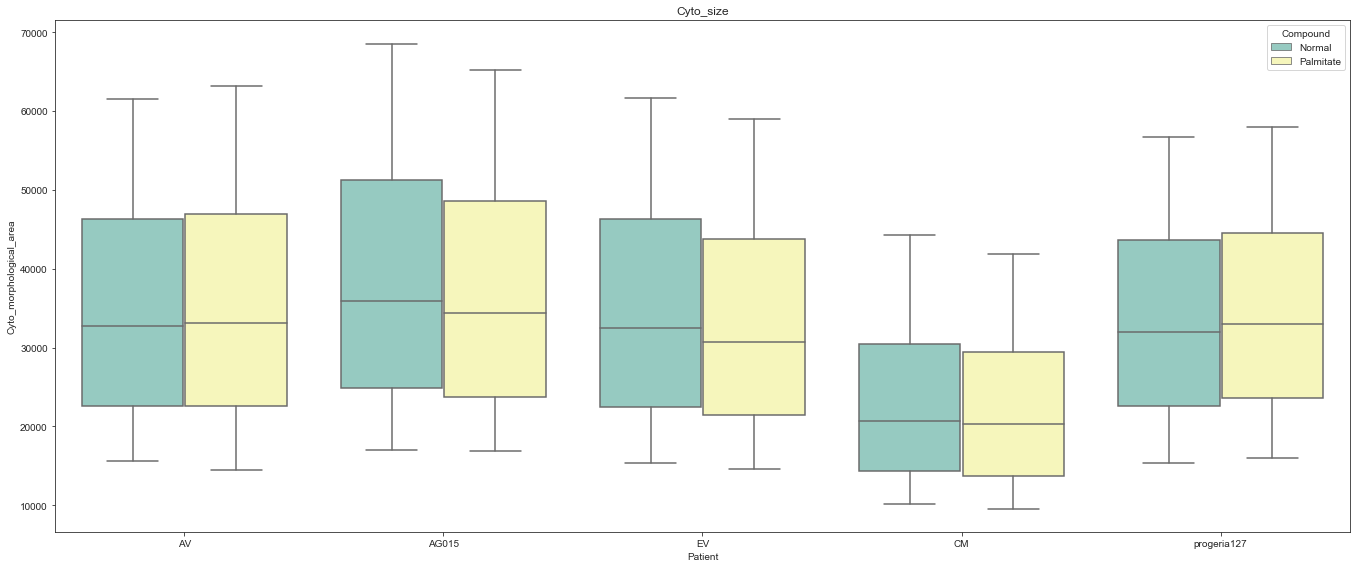

In [83]:
order = ['Normal', 'Palmitate']
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="Cyto_morphological_area", hue="Compound", data=df_example, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("Cyto_size")
plt.tight_layout()

# Pivot Tables

In [ ]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

In [ ]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

# Plotting

In [89]:
import matplotlib.pyplot as plt


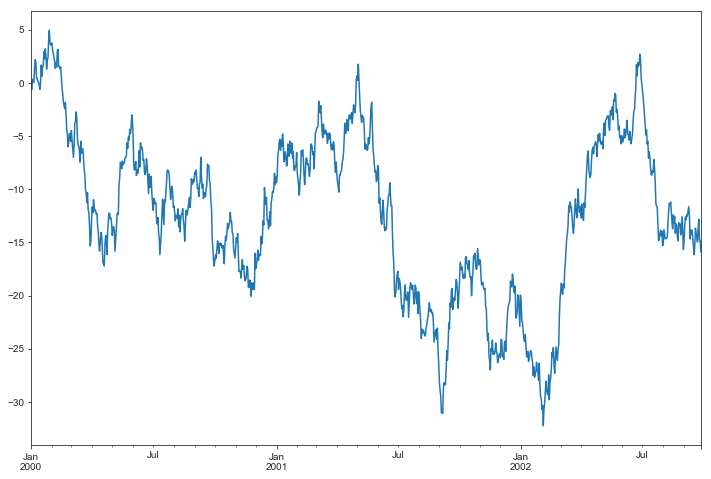

In [94]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [95]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()
plt.legend(loc='best')

In [96]:
df.mean().plot(kind='bar')